Newman 8.1 First-order differential equations with one variable We will not cover Section 8.1.4, on solutions over infinite ranges.

## 8.1 Ordinary Differential Equations

**Ordinary Differential Equations** are equations of a single variable and all dependant variables are functions of that one independant variable.

ex of first-order linear ODE: $\frac{dx}{dt} = \frac{2x}{t}$

Nonlinear ones can rarely be solve analytically so we do it numerically. We will require an initial condition or boundary condition to solve them numerically. General form for a first-order one-variable ODE is

$\frac{dx}{dt} = f(x, t)$

where 't' is the independant variable.

### Euler's Method

The taylor series expansion of our general form is

$x( t + h) = x(t) + h\frac{dx}{dt} + \frac{1}{2}h^2\frac{dx^2}{dt^2} + \dots \\
           = x(t) + h f(x, t) + O (h^2)$

We can break the interval into small steps and approximate the result in the interval. We can then plot the results of x(t).

This is a RARELY used method since there are better ones.

The error in this method is based around how small $h$ is, since we neglected the higher order terms int he taylor series expansion for small $h$-values. Since we made more than one step then our error is upon how many steps we made $N = (b - a) / h$. Denoting the values of t at which the steps fall by $t_k = a + kh$ and the corresponding values of x (which we calculate as we go along) by $x_k$, then the total error from a to b is given by the sum of the individual errors on each step:

$\sum^{N-1}{k=0} \frac{1}{2} h^2 (\frac{d^2x}{dt^2})_{x=x_k, t=t_k} = \frac{1}{2} h \sum^{N-1}{k=0} h (\frac{d^2x}{dt^2})_{x=x_k, t=t_k} \approx \frac{1}{2} h \int^b_a \frac{df}{dt} dt \\
= \frac{1}{2} h [f(x (b), b) - f (x (a), a)]$

The total error is linear in $h$ even though the individual errors are of order $h^2$, so the total error decreases by factor of two for an factor of two decreases in the length of $h$.



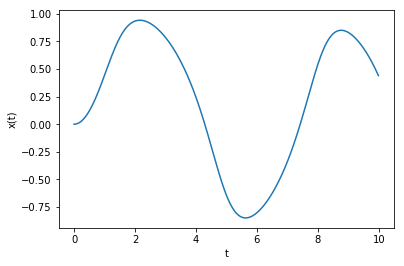

In [1]:
#example 8.1
from math import sin
from numpy import arange
from pylab import plot, xlabel, ylabel, show

def f (x, t):
    return -x**3 + sin(t)

a = 0 #start of interval
b = 10 #end of interval
N = 1000 #number of steps
h = (b - a) / N #step size
x = 0 #initial condition

tPoints = arange (a, b, h)
xPoints = []

for t in tPoints:
    xPoints.append (x)
    x += h * f (x, t)
    
plot (tPoints, xPoints)
xlabel ("t")
ylabel ("x(t)")
show ()

### Runge-Kutta Method

Since our approximation error from the Euler's method came from ignoring higher order components of the taylor series expansion, we can find a better approximation including a higher order term. The Euler's method was equivelent to taking the slope dx/dt at time t and extrapolating it into the future to time $t + h$. To make this more accurate we can instead extrapolate the slope at time $t + \frac{1}{2}h$. So the taylor series expansion around $t + \frac{1}{2}h$ and $t$ would be

$x(t + h) = x(t + \frac{1}{2}h) + \frac{1}{2}h(\frac{dx}{dt})_{t + \frac{1}{2}h} + \frac{1}{8}h^2\frac{dx^2}{dt^2}_{t + \frac{1}{2}h} + O(h^3)$,

and

$x(t) = x(t + \frac{1}{2}h) - \frac{1}{2}h(\frac{dx}{dt})_{t + \frac{1}{2}h} + \frac{1}{8}h^2\frac{dx^2}{dt^2}_{t + \frac{1}{2}h} + O(h^3)$.


Subtracting the second expression from the first and doing a little algebra

$x(t + h) = x(t) + h(\frac{dx}{dt})_{t + \frac{1}{2}h} + O(h^3) \\
 = x(t) + h f (x (t + \frac{1}{2}h), t + \frac{1}{2}h) + O(h^3)$
 
So the error term is now O(h^3). The problem with this is we need to know $x(t + \frac{1}{2}h)$, which we do not. We can get around this using the Euler's method $x(t + \frac{1}{2}h) = x(t) +\frac{1}{2}hf(x, t)$. The complete calculation for a single step can be written as

$k_1 = hf(x, t), \\
 k_2 = hf(x + \frac{1}{2}k_1, t + \frac{1}{2}h), \\
 x (t + h) = x(t) + k_2,$
 
where $k_2$ is our estimate for $x(t + \frac{1}{2}h)$.
 
These are the equations for the second-order Runge-Kutta method, and have an error of order $h^3$. Euler is a first-order Runge-Kutta method with an error of order $h^2$. Since we had to approximate our value of $x(t + \frac{1}{2})$ we have an additional error, but goes like $h^3$ and so this method is still accurate to an order of $h^3$.


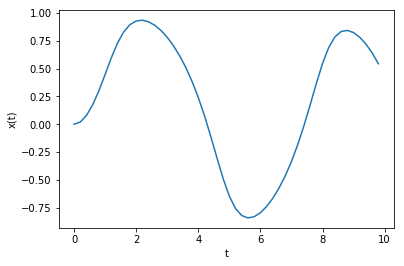

In [5]:
#example 8.2

from math import sin
from numpy import arange
from pylab import plot, xlabel, ylabel, show

def f (x, t):
    return -x**3 + sin(t)

a = 0 #start of interval
b = 10 #end of interval
N = 50 #number of steps
h = (b - a) / N #step size
x = 0 #initial condition

tPoints = arange (a, b, h)
xPoints = []

for t in tPoints:
    xPoints.append (x)
    k1 = h * f (x, t)
    k2 = h * f (x + 0.5 * k1, t + 0.5 * h)
    x += k2
    
plot (tPoints, xPoints)
xlabel ("t")
ylabel ("x(t)")
show ()

### Fourth-Order Runge-Kutta Method

The new equations we have are

$k_1 = hf (x, t) \\
 k_2 = hf(x + \frac{1}{2}k_1, t + \frac{1}{2}h), \\
 k_3 = hf(x + \frac{1}{2}k_2, t + \frac{1}{2}h), \\
 k_4 = hf(x + k_3, t + h), \\
 x (t + h) = x(t) + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)$.
 
 This is accurate to terms of order $h^4$ and carries an error of order $h^5$. This is the most commonly used order.

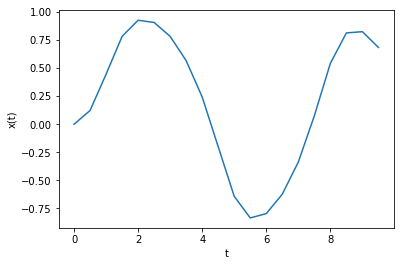

In [4]:
#example 8.3

from math import sin
from numpy import arange
from pylab import plot, xlabel, ylabel, show

def f (x, t):
    return -x**3 + sin(t)

a = 0 #start of interval
b = 10 #end of interval
N = 20 #number of steps
h = (b - a) / N #step size
x = 0 #initial condition

tPoints = arange (a, b, h)
xPoints = []

for t in tPoints:
    xPoints.append (x)
    k1 = h * f (x, t)
    k2 = h * f (x + 0.5 * k1, t + 0.5 * h)
    k3 = h * f (x + 0.5 * k2, t + 0.5 * h)
    k4 = h * f (x + k3, t + h)
    x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
plot (tPoints, xPoints)
xlabel ("t")
ylabel ("x(t)")
show ()

print the linked data    
cat linked\ data.txt

save linked data to a file name sunspots.txt  
cat linked\ data.txt > sunspots.txt

print a single column of the data (and then the other)  
cat linked\ data.txt | cut -f 1 ; cat linked\ data.txt | cut -f 2

count how many lines are in the file  
cat linked\ data.txt | wc -l  
3142

grep -o 7 linked\ data.txt | wc -l  
1725

calculate the sum of the total number of sunspots  
sum=0 ; for i in $(cat linked\ data.txt | cut -f 1); do (( sum = sum + i )); done  
4937653
